## Preprocessing train dataset

Divide the *train* folder into two folders *mytrain_ox* and *myvalid_ox*


In [2]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import shutil
import pandas as pd
%matplotlib inline

In [9]:
df = pd.read_csv('list.txt', sep=' ')
df.ix[2000:2005]

,IMAGE,ID,SPECIES,BREED
2000,basset_hound_14,4,2,3
2001,basset_hound_150,4,2,3
2002,basset_hound_151,4,2,3
2003,basset_hound_152,4,2,3
2004,basset_hound_153,4,2,3
2005,basset_hound_154,4,2,3


## Visualize the size of the original *train* dataset.

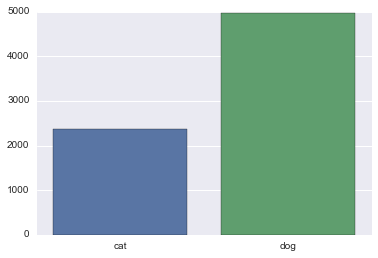

In [10]:
train_cat = df[df['SPECIES'] == 1]
train_dog = df[df['SPECIES'] == 2]
x = ['cat', 'dog']
y = [len(train_cat), len(train_dog)]
ax = sns.barplot(x=x, y=y)

## Shuffle and split the train filenames

In [11]:
mytrain, myvalid = train_test_split(df, test_size=0.1)
print len(mytrain), len(myvalid)

6614 735


## Visualize the size of the processed train dataset

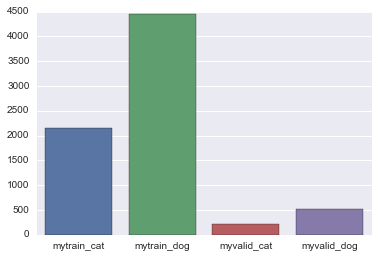

In [12]:
mytrain_cat = mytrain[mytrain['SPECIES'] == 1]
mytrain_dog = mytrain[mytrain['SPECIES'] == 2]
myvalid_cat = myvalid[myvalid['SPECIES'] == 1]
myvalid_dog = myvalid[myvalid['SPECIES'] == 2]
x = ['mytrain_cat', 'mytrain_dog', 'myvalid_cat', 'myvalid_dog']
y = [len(mytrain_cat), len(mytrain_dog), len(myvalid_cat), len(myvalid_dog)]

ax = sns.barplot(x=x, y=y)

## Create symbolic link of images

In [16]:
def remove_and_create_class(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)
    os.mkdir(dirname+'/cat')
    os.mkdir(dirname+'/dog')

remove_and_create_class('mytrain_ox')
remove_and_create_class('myvalid_ox')

for filename in mytrain_cat['IMAGE']:
    os.symlink('../../images/'+filename+'.jpg', 'mytrain_ox/cat/'+filename+'.jpg')

for filename in mytrain_dog['IMAGE']:
    os.symlink('../../images/'+filename+'.jpg', 'mytrain_ox/dog/'+filename+'.jpg')

for filename in myvalid_cat['IMAGE']:
    os.symlink('../../images/'+filename+'.jpg', 'myvalid_ox/cat/'+filename+'.jpg')

for filename in myvalid_dog['IMAGE']:
    os.symlink('../../images/'+filename+'.jpg', 'myvalid_ox/dog/'+filename+'.jpg')
